In [1]:
!pip install kaggle

In [0]:
from getpass import getpass
import os
user = 'ahmadelsallab'
key = '6b7ffe97ff5bc0656e325b746b72fa31'

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c ashrae-energy-prediction

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
weather_test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
weather_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
building_metadata.csv: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip train.csv.zip
!unzip weather_train.csv.zip
!unzip building_metadata.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  weather_train.csv.zip
replace weather_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
unzip:  cannot find or open building_metadata.csv.zip, building_metadata.csv.zip.zip or building_metadata.csv.zip.ZIP.


In [0]:
import pandas as pd
train_df = pd.merge(pd.merge(pd.read_csv('train.csv'), pd.read_csv('building_metadata.csv'), on='building_id', how='left'), pd.read_csv('weather_train.csv'), on=['timestamp','site_id'], how='left')



In [0]:
import numpy as np

train_df.meter_reading = train_df.meter_reading.apply(np.log1p)


In [0]:
meters_types_data_dict = dict(list(train_df.groupby('meter')))


# Plot of temp per timestamps


In [0]:
#time2idx = dict(zip(meters_types_data_dict[0].timestamp.unique(), np.arange(len(meters_types_data_dict[0].timestamp.unique()))))


In [0]:
#map_time2idx = lambda x:time2idx[x]

In [0]:
#map_time2idx('2016-02-09 11:00:00')

In [0]:
#meters_types_data_dict[0]['timeidx'] = meters_types_data_dict[0].timestamp.apply(map_time2idx)

In [0]:
#meters_types_data_dict[0].columns

In [0]:
#meters_types_data_dict[0].plot.scatter(x='timeidx', y='air_temperature')

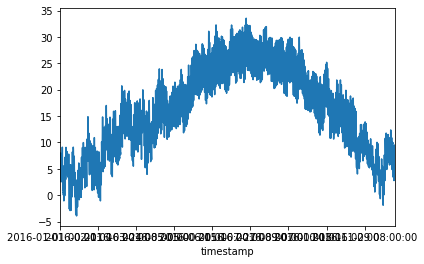

In [13]:
#meters_types_data_dict[0].groupby('timestamp').mean().air_temperature.plot()
train_df.groupby('timestamp').mean().air_temperature.plot()

As expected, the temp pattern peaks in the mid of year.

# Scatter temp vs. meter reading

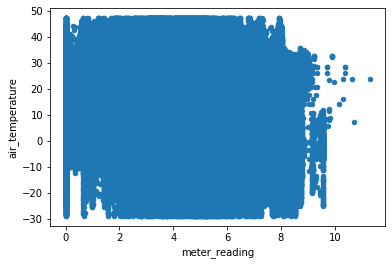

In [14]:
meters_types_data_dict[0].plot.scatter(x='meter_reading', y='air_temperature')

# Tables joining --> train_df

## Ensure no missing keys:
- train: timestamp, building_id --> building_meta: building_id | site_id --> weather(site_id, timestamp). Checks:

1. train(timestamps) <> weather(timestamps)
2. train(building_id) <> building_meta(building_id)
3. building(train(building_id) | site_id) <> weather(site_id)

# EDA:

# Hist

# Skew?

# Target var: skew?
- Log1p + 1

# Correlation to target var



# Types: Categorical | Numerical | Ordinal | Nominal

# Missing vals
# Missing vals handling

# Outliers 

# Data prep:
## Types encoding


# Modeling
# Derived featues:
- Season: Winter|Autumn|Summer|Spring
- Weakend: Y|N
- Holiday: Y|N
- Time-of-day: day|night --> Morning|Afternoon|Evening|Night
## Featues: Xgboost:
1. Individula
2. Additive
3. Ablation

## Model:
Regression:

- xgboost
- DT
- Adaboost
- Lgbm
